In [1]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rcdefaults()
plt.rcParams
%matplotlib inline
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
# Function to execute the rsync command to copy files from remote
def copy_files_from_remote(remote_host, remote_folder, local_base_folder):
    # Define the rsync command to copy .dat and .in files recursively
    rsync_command = f"rsync -av --include='*/' --include='*.txt' --exclude='*' {remote_host}:{remote_folder}/ {local_base_folder}/"
    
    # Run the command
    subprocess.run(rsync_command, shell=True, check=True)


In [ ]:

# Define the connection and folder details
remote_host = "euler"
remote_folder = "/cluster/scratch/lmarin/darkart/darkart_with_RI_3s/data"
local_base_folder = "../data/darkart/darkart_with_RI3s"
output_folder = "../data/numpy_arrays/darkart/"  # Folder to store saved numpy arrays

# Create local folder if not exists
os.makedirs(local_base_folder, exist_ok=True)

# Step 1: Copy files from remote server using rsync
copy_files_from_remote(remote_host, remote_folder, local_base_folder)

In [3]:
local_base_folder = "../data/darkart/darkart_with_RI3s"

In [4]:
def load_dat_file(file_path):
    with open(file_path, 'r') as f:
                
        data = np.loadtxt(f)
    
    return data

In [5]:
all_arrays = {}
for root, dirs, files in os.walk(local_base_folder):
    for file in files:
        if file.endswith(".txt"):
            file_path = os.path.join(root, file)
            array = load_dat_file(file_path)
            

            # Get the subfolder name (relative to the base folder)
            subfolder_name = os.path.relpath(root, local_base_folder).replace(os.sep, "_")
            subfolder_name = subfolder_name + file
            print("subfolder name:", subfolder_name)

            # Save the numpy arrays, naming them by subfolder
            # save_arrays(arrays, output_folder, subfolder_name)
            all_arrays[subfolder_name] = array

subfolder name: atomic_response_2Ar_3s.txt
subfolder name: radial_integral_1Ar_3s_1_1.txt
subfolder name: radial_integral_1Ar_3s_2_2.txt
subfolder name: radial_integral_1Ar_3s_7_7.txt
subfolder name: radial_integral_1Ar_3s_3_3.txt
subfolder name: radial_integral_1Ar_3s_6_6.txt
subfolder name: radial_integral_1Ar_3s_5_5.txt
subfolder name: radial_integral_1Ar_3s_0_0.txt
subfolder name: radial_integral_1Ar_3s_4_4.txt
subfolder name: atomic_response_3Ar_3s.txt
subfolder name: atomic_response_1Ar_3s.txt
subfolder name: radial_integral_2Ar_3s_1_1.txt
subfolder name: radial_integral_2Ar_3s_3_2.txt
subfolder name: radial_integral_2Ar_3s_4_5.txt
subfolder name: radial_integral_2Ar_3s_2_2.txt
subfolder name: radial_integral_2Ar_3s_0_1.txt
subfolder name: radial_integral_2Ar_3s_2_3.txt
subfolder name: radial_integral_2Ar_3s_6_5.txt
subfolder name: radial_integral_2Ar_3s_3_4.txt
subfolder name: radial_integral_2Ar_3s_7_7.txt
subfolder name: radial_integral_2Ar_3s_2_1.txt
subfolder name: radial_in

In [6]:
all_arrays['atomic_response_2Ar_3s.txt'].shape

(100, 100)

In [8]:
GeV = 1.0;
eV = 1.0E-9*GeV
keV = 1.0E-6*GeV

qMin = 1.0*keV
qMax = 1000*keV
kMin = 0.1*keV
kMax = 100*keV
gridsize = 100
gridsize = 100

kGrid = np.logspace(np.log10(kMin), np.log10(kMax), gridsize)
qGrid = np.logspace(np.log10(qMin), np.log10(qMax), gridsize)

In [9]:
(qGrid/keV).min()

1.0

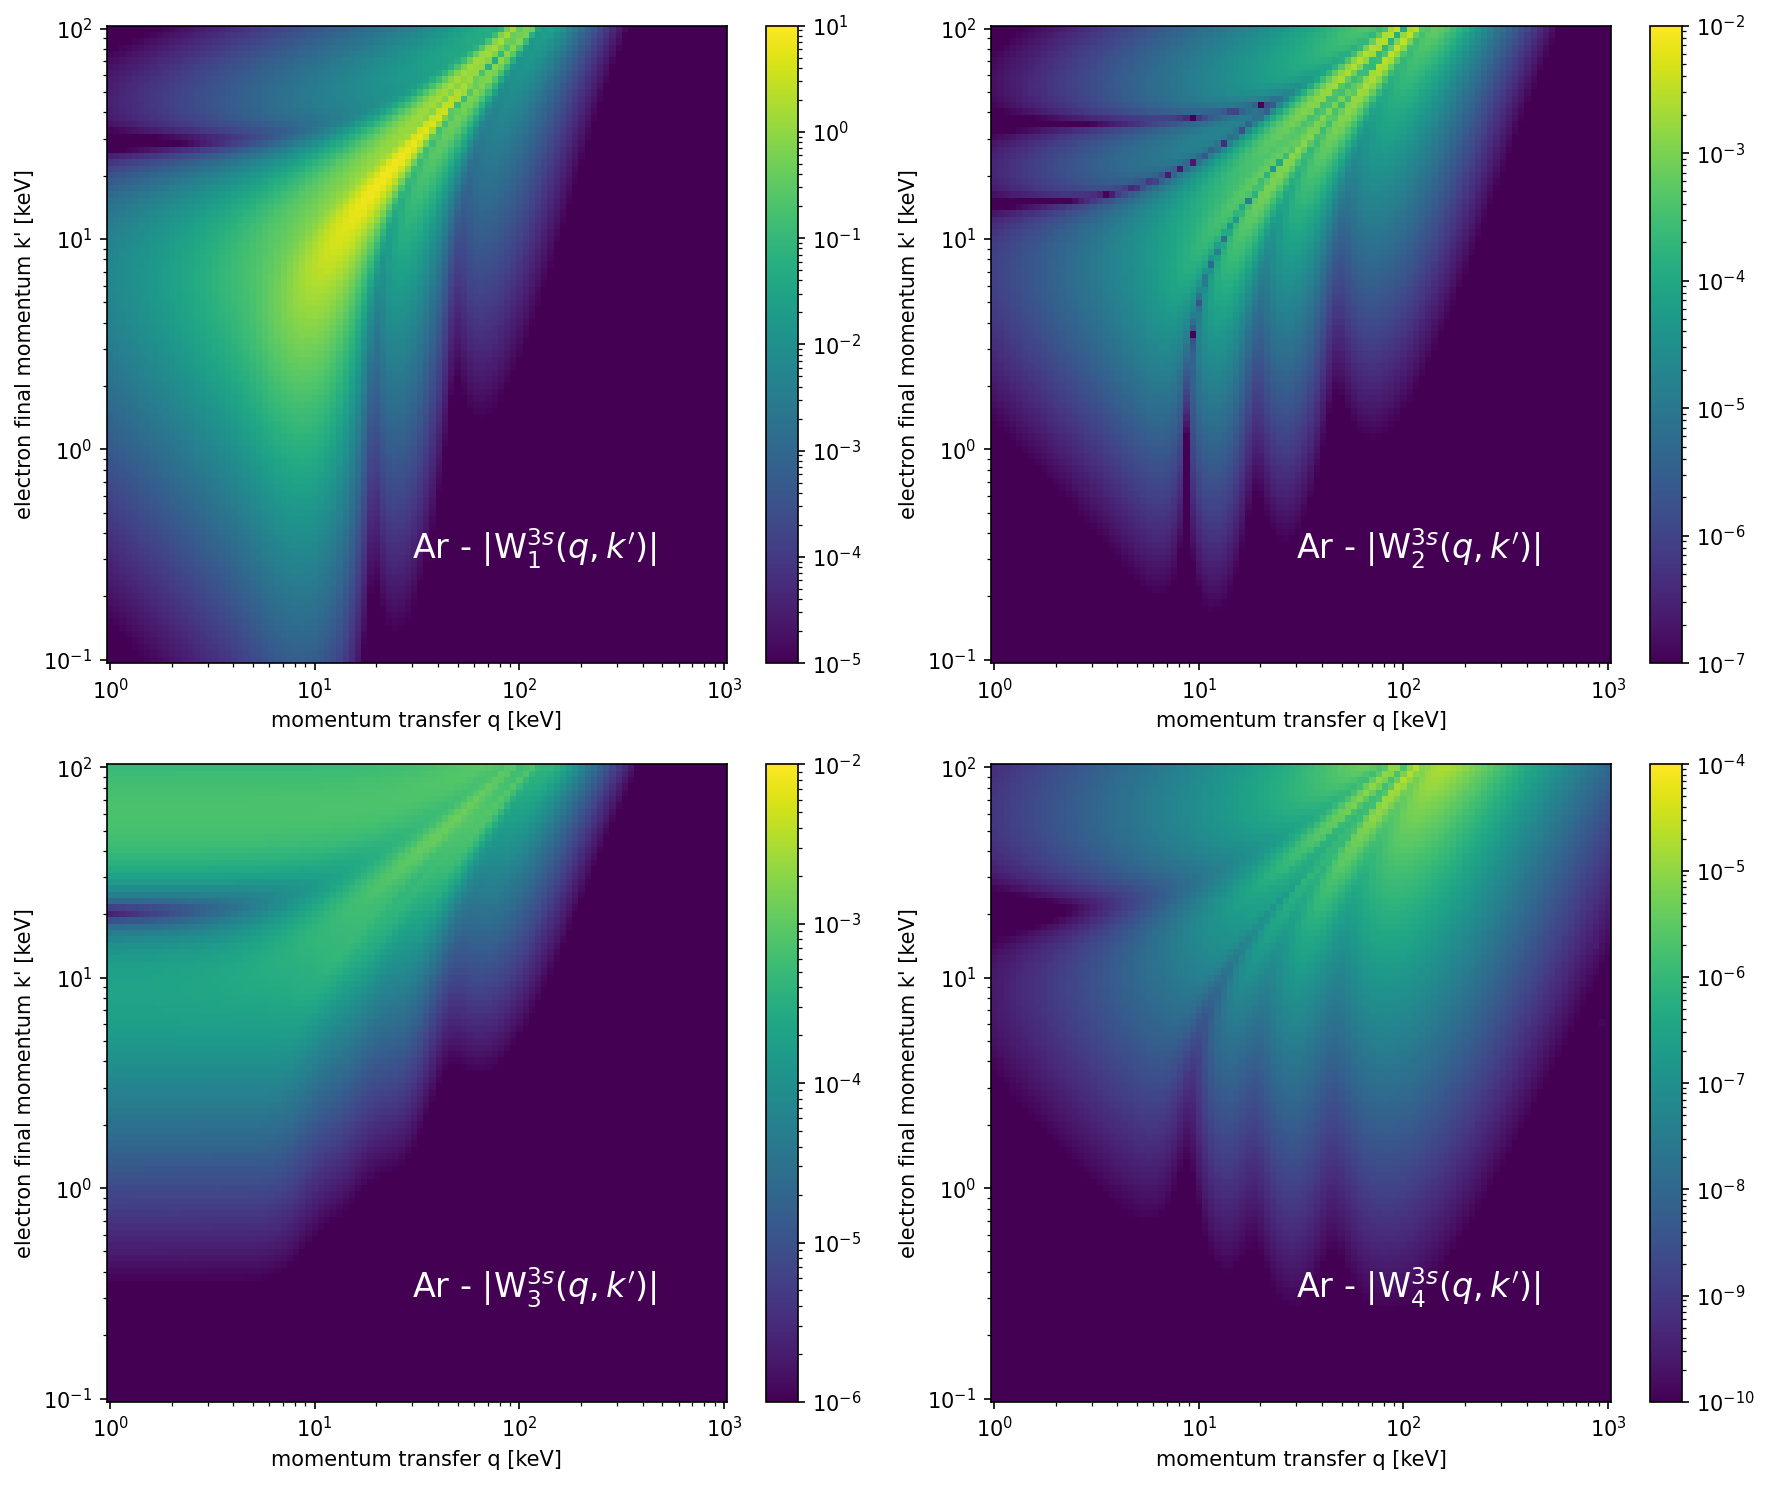

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
X_grid, Y_grid = np.meshgrid(qGrid/keV, kGrid/keV)

text = [r"Ar - |W$^{3s}_{1} (q, k')$|", r"Ar - |W$^{3s}_{2} (q, k')$|", r"Ar - |W$^{3s}_{3} (q, k')$|", r"Ar - |W$^{3s}_{4} (q, k')$|"]
keys = ['atomic_response_1Ar_3s.txt', 'atomic_response_2Ar_3s.txt', 'atomic_response_3Ar_3s.txt', 'atomic_response_4Ar_3s.txt']
extrema = [[10**-5, 10],[10**-7, 10**-2],[10**-6, 10**-2],[10**-10, 10**-4]]
# Loop over the subplots and plot each 2D array
for ax, key, ext, txt in zip(axs.ravel(), keys, extrema, text):
    # Plot the 2D colormap with logarithmic color normalization
    pcolormesh = ax.pcolormesh(X_grid, Y_grid, np.abs(all_arrays[key]), shading='auto', norm=LogNorm(vmin=ext[0], vmax=ext[1]))
    
    # Set log scales for both axes
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Add labels and title
    ax.set_xlabel(r'momentum transfer q [keV]')
    ax.set_ylabel(r"electron final momentum k' [keV]")
    ax.text(0.3*10**2, 0.3*1, txt, color='white', fontsize=16)

    
    # Add a single color bar for the entire figure
    cbar = fig.colorbar(pcolormesh, ax=ax)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('../Images/darkart/all_Ws_3s_Ar.pdf', bbox_inches='tight')

# Display the plot
plt.show()
        